# From the students' grades in other subjects, can we predict how they score in mathematics?

data:
* training.json
* sample-test.in.json
* sample-test.out.json

In [1]:
# Enter your code here. Read input from STDIN. Print output to STDOUT

import pandas as pd 
import json

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num_lines = 69530 #int(input())

In [3]:
#inputs = [json.loads("train.txt") for _ in range(num_lines)]
#test_df = pd.DataFrame(num_lines).fillna(0)
with open('training.json') as f:
    data = [json.loads(line) for line in f]
    data.remove(data[0])
    train_df = pd.DataFrame(data).fillna(0)
    
test_df = pd.read_csv("sample-test.out.json", header = None, names = ["grade"])

In [4]:
train_df.head()

,Accountancy,Biology,BusinessStudies,Chemistry,ComputerScience,Economics,English,Mathematics,PhysicalEducation,Physics,serial
0,0.0,0.0,0.0,7.0,0.0,0.0,4,6,3.0,8.0,195490
1,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,1.0,190869
2,0.0,0.0,0.0,2.0,0.0,0.0,1,2,2.0,1.0,3111
3,0.0,0.0,0.0,7.0,0.0,0.0,7,7,6.0,8.0,47738
4,0.0,0.0,0.0,1.0,0.0,0.0,3,2,1.0,1.0,85520


In [5]:
test_df

,grade
0,2
1,4
2,1
3,2
4,8
5,5
6,8
7,4
8,5
9,1


In [6]:
train_df.describe()

,Accountancy,Biology,BusinessStudies,Chemistry,ComputerScience,Economics,English,PhysicalEducation,Physics,serial
count,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000,69529.000000
mean,0.437213,0.677214,0.481296,3.290469,0.916121,0.431805,3.046959,1.266853,3.306980,111347.639086
std,1.202609,1.670681,1.332722,2.469943,1.946385,1.173290,1.783387,1.963182,2.517914,64342.237044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,55645.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,3.000000,111348.000000
75%,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,2.000000,5.000000,167037.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,222845.000000


In [6]:
train_df.isna().sum()

Accountancy          0
Biology              0
BusinessStudies      0
Chemistry            0
ComputerScience      0
Economics            0
English              0
Mathematics          0
PhysicalEducation    0
Physics              0
serial               0
dtype: int64

We don't need to clean the data. 

In [15]:
X = train_df.drop(columns=["serial","Mathematics"])
y = train_df.Mathematics

corr = X.join(y).corr()

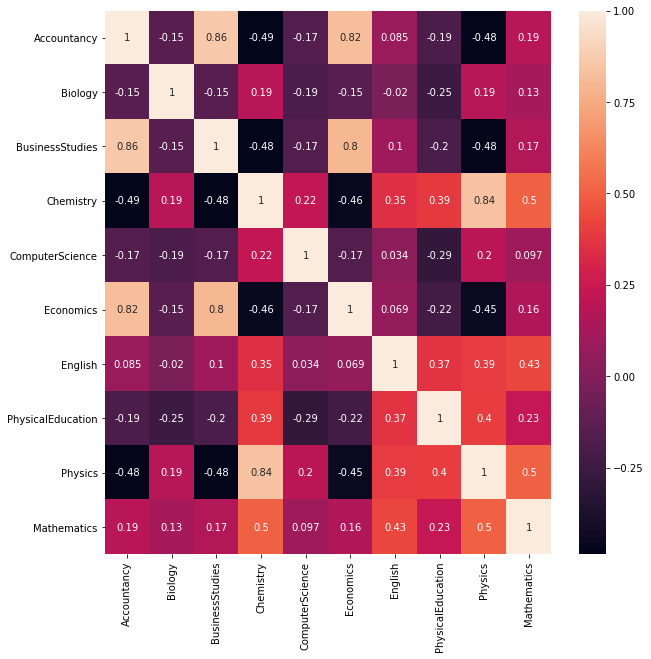

In [16]:

plt.figure(figsize=[10,10])
sns.heatmap(corr, annot=True)

In [18]:
train_df.columns

Index(['Accountancy', 'Biology', 'BusinessStudies', 'Chemistry',
       'ComputerScience', 'Economics', 'English', 'Mathematics',
       'PhysicalEducation', 'Physics', 'serial'],
      dtype='object')

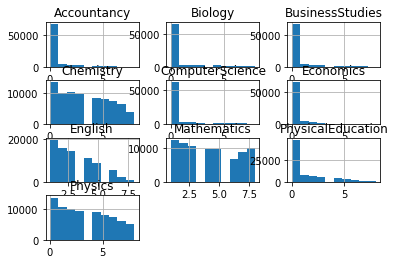

In [43]:
train_df.drop(columns="serial").hist()
pass

In [98]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split

split data into train and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42)


In [71]:
#model = RandomForestRegressor()
model = LogisticRegression()
#model = CatBoostRegressor()

In [72]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
model.score(X_test,y_test)

0.33065131177547286

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [151]:
C_param_range = [1e-6,1e-5,1e-4,1e-3,1e-2]
acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

kf = KFold(n_splits=len(C_param_range), random_state=42)

In [152]:
j = 0
for train_index, test_index in kf.split(X):
    print("index: ", j)
    C = C_param_range[j]
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = C,random_state = 0)
    lr.fit(X.iloc[train_index],y[train_index])
    
    # Predict using model
    y_pred = lr.predict(X.iloc[test_index])
    
    # Saving accuracy score in table
    acc_table.iloc[j,1] = accuracy_score(y[test_index],y_pred)
    j += 1

index:  0
index:  1
index:  2
index:  3
index:  4


In [153]:
acc_table

,C_parameter,Accuracy
0,0.000001,0.123702
1,0.000010,0.127037
2,0.000100,0.248789
3,0.001000,0.308438
4,0.010000,0.331593


In [168]:
best_C = acc_table.loc[acc_table.Accuracy == min(acc_table.Accuracy)].C_parameter[0]

In [169]:
best_model = LogisticRegression(C=best_C)
best_model.fit(X_train,y_train)

LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
best_model.score(X_test,y_test)

0.12831757169005492